### Neural Networks -- Keras (Linear Problem)
> In this problem we will identify a color using a simple NN implemented using the Keras API

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import numpy as np
from tensorflow import keras
import pandas as pd

In [2]:
train_data = pd.read_csv('data/train.csv')
test_data = pd.read_csv('data/test.csv')

In [3]:
np.random.shuffle(train_data.values)
np.random.shuffle(test_data.values)

In [4]:
train_data.head()

,x,y,color
0,3.217611,4.485714,0.0
1,2.212610,3.246723,0.0
2,0.192601,0.577359,0.0
3,1.328990,2.204454,0.0
4,4.345227,5.594037,0.0


In [5]:
train_data.color.unique()

array([0., 1.])

> We have to classify if a color is either `0` or `1` using Neural Networks.

### Extracting columns from a pandas datafram to numpy arrays

#### 1. First way
> Using numpy `column_stack()` function

In [6]:
X_train = np.column_stack([train_data.x.values, train_data.y.values])
X_train

array([[3.2176107 , 4.4857142 ],
       [2.21261049, 3.2467228 ],
       [0.1926006 , 0.57735909],
       ...,
       [2.96239673, 4.13644968],
       [2.33627892, 3.51532702],
       [4.47424221, 5.74981609]])

#### 2. 2nd way
> Using numpy `fancy` indexing

In [7]:
X_train = train_data[:].values[:, :2]
y_train = train_data[:].values[:, -1].astype(np.uint8)
X_train[0], y_train[0]

X_test = test_data[:].values[:,:2]
y_test = test_data[:].values[:,-1].astype(np.uint8)

X_train[0], y_test[0]

(array([3.2176107, 4.4857142]), 1)

### Visualisation
> We are going to visualize our data using `seaborn`

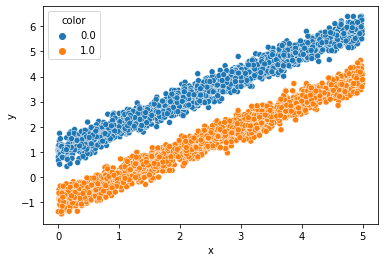

In [8]:
sns.scatterplot(data=train_data, x='x', y='y', hue='color')
plt.show()

> By looking at this data we can see that this data is easy to classify.

### Building our First Neural Network.

In [9]:
X_train.ndim , y_train.shape

(2, (4000,))

> Before fitting the data we must `shuffle` it first

### Model Creation

In [10]:
model = keras.Sequential([
    # This is our first layer with 4 Neurons and two inputs X and y
    keras.layers.Dense(4, input_shape=(2,), activation='relu'),
    # This is our output layer with 2 outputs
    keras.layers.Dense(2, activation= 'sigmoid' )
])

### Terms to understand

1. Dense
* **Dense layer** is the regular deeply connected neural network layer. It is most common and frequently used layer. **Dense layer** does the below operation on the input and return the output.
```
output = activation(dot(input, kernel) + bias)
```
[Keras Docs](https://keras.io/api/layers/core_layers/dense/)

2. Activations
[Keras Docs](https://keras.io/api/layers/activations/)
* **relu** - Applies the rectified linear unit activation function
* **sigmoid** - Applies the sigmoid activation function. **For small values (<-5), sigmoid returns a value close to zero, and for large values (>5) the result of the function gets close to 1.** Sigmoid is equivalent to a 2-element Softmax, where the second element is assumed to be zero. **The sigmoid function always returns a value between `0 and 1`.**
* **softmax** - Softmax converts a real vector to a vector of categorical probabilities. The elements of the output vector are in range **(0, 1) and sum to 1**.  Basically the softmax give us the probability of the outcome to occur.
* **softplus**
* **softsign**
* **tanh** - Hyperbolic tangent activation function.
* **selu** - **S**caled **E**xponential **L**inear **U**nit **(SELU).**
* **elu** - **E**xponential **L**inear **U**nit.
* **exponentail** 

### Model Compilation
> To compile the model we use the `model.compile()` function.

In [11]:
model.compile(optimizer="adam",
             loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
             metrics=["accuracy"])

### Terms to know.

1. **Optimizers**
   a) **SGD**
   ```
   tf.keras.optimizers.SGD(
    learning_rate=0.01, momentum=0.0, nesterov=False, name="SGD", **kwargs)
   ```
   b) **RMSprop**
   ```
   tf.keras.optimizers.RMSprop(
    learning_rate=0.001,
    rho=0.9,
    momentum=0.0,
    epsilon=1e-07,
    centered=False,
    name="RMSprop",
    **kwargs
    )
   ```
   c) **Adam**
   ```
   tf.keras.optimizers.Adam(
    learning_rate=0.001,
    beta_1=0.9,
    beta_2=0.999,
    epsilon=1e-07,
    amsgrad=False,
    name="Adam",
    **kwargs
    )
   ```
   d). **Adadelta**
   e). **Adagrad**
   f). **Adamax**
   g). **Nadam**
   f). **Ftrl**
   
   [More](https://keras.io/api/optimizers)

2. **Loses**
* The purpose of loss functions is to compute the quantity that a model should seek to minimize during training.
> [Docs](https://keras.io/api/losses/)

 * **BinaryCrossentropy** - Use this cross-entropy loss when there are only two label classes (assumed to be 0 and 1). For each example, there should be a single floating-point value per prediction.
* **CategoricalCrossentropy** - Use this crossentropy loss function when there are two or more label classes. We expect labels to be provided in a one_hot representation.

* **SparseCategoricalCrossentropy** - Use this crossentropy loss function when there are two or more label classes. We expect labels to be provided as integers. If you want to provide labels using one-hot representation, please use CategoricalCrossentropy loss. There should be # classes floating point values per feature for y_pred and a single floating point value per feature for y_true.

**....**

3. **Metrics**
**[Docs](https://keras.io/api/metrics/)**


### Fitting the Model

In [12]:
model.fit(X_train, y_train, batch_size=5, epochs=10)

Epoch 1/10
800/800 [==============================] - 2s 1ms/step - loss: 1.0058 - accuracy: 0.5893
Epoch 2/10
800/800 [==============================] - 1s 1ms/step - loss: 0.1947 - accuracy: 0.9970
Epoch 3/10
800/800 [==============================] - 1s 1ms/step - loss: 0.0950 - accuracy: 1.0000
Epoch 4/10
800/800 [==============================] - 1s 1ms/step - loss: 0.0521 - accuracy: 1.0000
Epoch 5/10
800/800 [==============================] - 1s 1ms/step - loss: 0.0289 - accuracy: 1.0000
Epoch 6/10
800/800 [==============================] - 1s 994us/step - loss: 0.0166 - accuracy: 1.0000
Epoch 7/10
800/800 [==============================] - 1s 992us/step - loss: 0.0094 - accuracy: 1.0000
Epoch 8/10
800/800 [==============================] - 1s 999us/step - loss: 0.0058 - accuracy: 1.0000
Epoch 9/10
800/800 [==============================] - 1s 994us/step - loss: 0.0042 - accuracy: 1.0000
Epoch 10/10
800/800 [==============================] - 1s 1ms/step - loss: 0.0030 - accuracy

### Model Evaluation

In [13]:
model.evaluate(X_test, y_test)

32/32 [==============================] - 0s 1ms/step - loss: 0.0023 - accuracy: 1.0000


[0.002272269455716014, 1.0]

> Our model is accurate in predicting colors.

### Making predictions

In [14]:
model.predict(X_test[:5]), y_test[:5]

(array([[0.08780494, 0.99517524],
        [0.10543489, 0.9921296 ],
        [0.0339725 , 0.99945176],
        [0.9931221 , 0.036652  ],
        [0.94156075, 0.08054531]], dtype=float32),
 array([1, 1, 1, 0, 0], dtype=uint8))

In [ ]:
> Probably our mode